## Here is where plotting functions are kept. First, let's import. 

In [2]:
from NcReader import *
from Experiment import * 

import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams["font.size"] = "16"


In [19]:
e = Experiment('/home/hma000/accomatic-web/tests/test_data/toml/SEP_KDI.toml')
df = e.obs().join(e.mod())
df = df.groupby('time').mean()
df = df.resample('M').mean().dropna()
df['ensemble'] = df[['era5', 'jra5', 'merr']].mean(axis=1)
df = df.reset_index(drop=False).melt(id_vars=["time"], var_name="sim", value_name="pred")
print(df.head())

                  obs       era5       jra5       merr
time                                                  
2017-07-31   9.949346  11.859748  13.337145   6.733067
2017-08-31  11.524052  12.409923  13.580657   5.900860
2017-09-30   6.422047   5.803860   5.569992   1.414492
2017-10-31   0.106819  -3.731244  -4.540299  -5.121115
2017-11-30  -3.443244 -19.144999 -23.567539 -12.733681
        time  sim       pred
0 2017-07-31  obs   9.949346
1 2017-08-31  obs  11.524052
2 2017-09-30  obs   6.422047
3 2017-10-31  obs   0.106819
4 2017-11-30  obs  -3.443244


/home/hma000/.conda/envs/acco/lib/python3.9/site-packages/pandas/core/indexes/base.py:327: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return libjoin.left_join_indexer_unique(sv, ov)


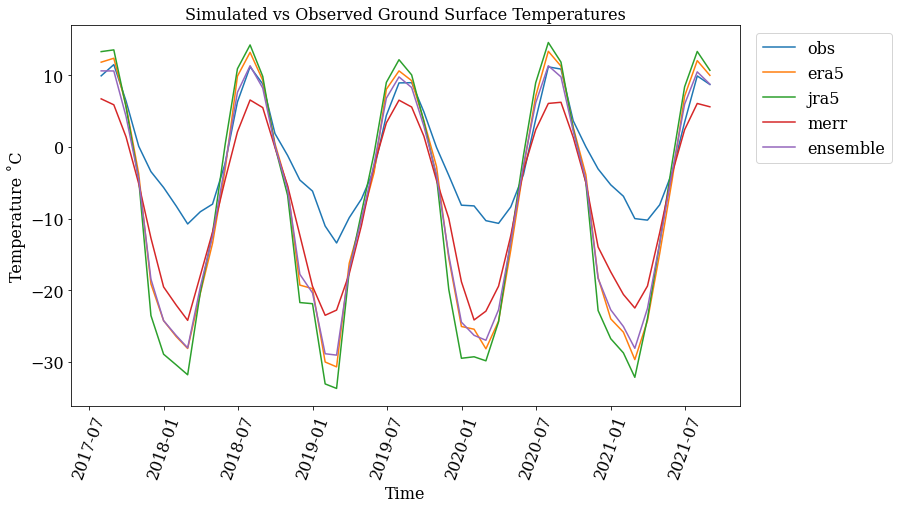

In [43]:

plt.figure(figsize=(12, 7))
ax = sns.lineplot(x = "time", y="pred", hue="sim", data=df, ci='sd', err_style='band')
plt.title("Simulated vs Observed Ground Surface Temperatures", fontsize=16)
plt.xlabel("Time", fontsize=16)
plt.xticks(rotation=70)
plt.ylabel("Temperature ˚C")
ax.legend(loc='upper center', bbox_to_anchor=(1.125, 1), ncol=1)
plt.show()